## [Allstate Claims Severity](https://goo.gl/1DwHVy)

### Author: Dr. Rahul Remanan, CEO and  Chief Imagination Officer [Moad Computer](https://www.moad.computer)

The [Allstate Corporation](https://en.wikipedia.org/wiki/Allstate) is the one of the largest insurance providers in the United States and one of the largest that is publicly held. The company also has personal lines insurance operations in Canada. Allstate was founded in 1931 as part of Sears, Roebuck and Co., and was spun off in 1993.[1](https://goo.gl/ce2JJ2) The company has had its headquarters in Northfield Township, Illinois, near Northbrook since 1967.[2](https://goo.gl/oX4kfZ)[3](https://goo.gl/mcTd3y)

Allstate's current efforts in developing automated methods of predicting the cost, and hence severity, of claims, they releasd a claims severity assessment dataset on Kaggle.[4](https://goo.gl/1DwHVy) In this challenge, datascientists were invited to show off their creativity and flex their technical chops by creating an algorithm which accurately predicts claims severity. The goal of this calleenge was to help aspiring competitor demonstrate their insight into better ways of predicting claims severity.

This R Jupyter notebook is a modified fork of a Kaggle kernel.[5](https://goo.gl/un416B)

### Import dependent libraries:

In [1]:
knitr::opts_chunk$set(echo = TRUE)
library(data.table)
library(gridExtra)
library(corrplot)
library(GGally)
library(ggplot2)
library(e1071)

corrplot 0.84 loaded


In [2]:
dt_train <- fread("./data/train.csv")

In [3]:
dt_test <- fread("./data/test.csv")

In [4]:
names(dt_train)

[1] "id"     "cat1"   "cat2"   "cat3"   "cat4"   "cat5"   "cat6"   "cat7"  
  [9] "cat8"   "cat9"   "cat10"  "cat11"  "cat12"  "cat13"  "cat14"  "cat15" 
 [17] "cat16"  "cat17"  "cat18"  "cat19"  "cat20"  "cat21"  "cat22"  "cat23" 
 [25] "cat24"  "cat25"  "cat26"  "cat27"  "cat28"  "cat29"  "cat30"  "cat31" 
 [33] "cat32"  "cat33"  "cat34"  "cat35"  "cat36"  "cat37"  "cat38"  "cat39" 
 [41] "cat40"  "cat41"  "cat42"  "cat43"  "cat44"  "cat45"  "cat46"  "cat47" 
 [49] "cat48"  "cat49"  "cat50"  "cat51"  "cat52"  "cat53"  "cat54"  "cat55" 
 [57] "cat56"  "cat57"  "cat58"  "cat59"  "cat60"  "cat61"  "cat62"  "cat63" 
 [65] "cat64"  "cat65"  "cat66"  "cat67"  "cat68"  "cat69"  "cat70"  "cat71" 
 [73] "cat72"  "cat73"  "cat74"  "cat75"  "cat76"  "cat77"  "cat78"  "cat79" 
 [81] "cat80"  "cat81"  "cat82"  "cat83"  "cat84"  "cat85"  "cat86"  "cat87" 
 [89] "cat88"  "cat89"  "cat90"  "cat91"  "cat92"  "cat93"  "cat94"  "cat95" 
 [97] "cat96"  "cat97"  "cat98"  "cat99"  "cat100" "cat101" "cat102" "cat103"
[105] "cat104" "cat105" "cat106" "cat107" "cat108" "cat109" "cat110" "cat111"
[113] "cat112" "cat113" "cat114" "cat115" "cat116" "cont1"  "cont2"  "cont3" 
[121] "cont4"  "cont5"  "cont6"  "cont7"  "cont8"  "cont9"  "cont10" "cont11"
[129] "cont12" "cont13" "cont14" "loss"

In [5]:
cat_var <- names(dt_train)[which(sapply(dt_train, is.character))]
num_var <- names(dt_train)[which(sapply(dt_train, is.numeric))]
num_var <- setdiff(num_var, c("id", "loss"))

dt_train_cat <- dt_train[,.SD, .SDcols = cat_var]
dt_train_num <- dt_train[,.SD,.SDcols = num_var]

In [6]:
plotBox <- function(data_in, i, lab) {
  data <- data.frame(x=data_in[[i]], y=lab)
  p <- ggplot(data=data, aes(x=x, y=y)) +geom_boxplot()+ xlab(colnames(data_in)[i]) + theme_light() + 
   ylab("log(loss)") + theme(axis.text.x = element_text(angle = 90, hjust =1))
  return (p)
}

In [7]:
doPlots <- function(data_in, fun, ii, lab, ncol=3) {
  pp <- list()
  for (i in ii) {
    p <- fun(data_in=data_in, i=i, lab=lab)
    pp <- c(pp, list(p))
  }
  do.call("grid.arrange", c(pp, ncol=ncol))
}

In [8]:
plotScatter <- function(data_in, i, lab){
  data <- data.frame(x=data_in[[i]], y = lab)
  p <- ggplot(data= data, aes(x = x, y=y)) + geom_point(size=1, alpha=0.3)+ geom_smooth(method = lm) +
    xlab(paste0(colnames(data_in)[i], '\n', 'R-Squared: ', round(cor(data_in[[i]], lab, use = 'complete.obs'), 2)))+
    ylab("log(loss)") + theme_light()
  return(suppressWarnings(p))
} 

In [9]:
plotDen <- function(data_in, i, lab){
  data <- data.frame(x=data_in[[i]], y=lab)
  p <- ggplot(data= data) + geom_density(aes(x = x), size = 1,alpha = 1.0) +
    xlab(paste0((colnames(data_in)[i]), '\n', 'Skewness: ',round(skewness(data_in[[i]], na.rm = TRUE), 2))) +
    theme_light() 
  return(p)
}

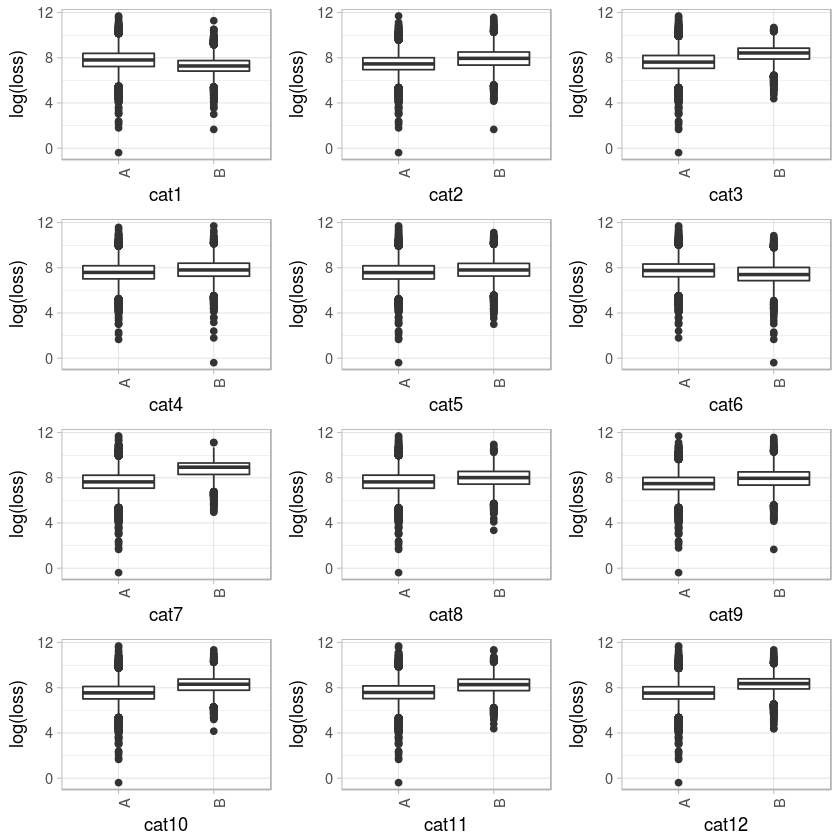

In [10]:
doPlots(dt_train_cat, fun = plotBox, ii =1:12, lab=log(dt_train$loss), ncol = 3)
#doPlots(dt_train_cat, fun = plotBox, ii =13:24, lab=log(dt_train$loss), ncol = 3)
#doPlots(dt_train_cat, fun = plotBox, ii =25:36, lab=log(dt_train$loss), ncol = 3)
#doPlots(dt_train_cat, fun = plotBox, ii =37:48, lab=log(dt_train$loss), ncol = 3)
#doPlots(dt_train_cat, fun = plotBox, ii =49:60, lab=log(dt_train$loss), ncol = 3)
#doPlots(dt_train_cat, fun = plotBox, ii =61:72, lab=log(dt_train$loss), ncol = 3)
#doPlots(dt_train_cat, fun = plotBox, ii =73:84, lab=log(dt_train$loss), ncol = 3)
#doPlots(dt_train_cat, fun = plotBox, ii =85:96, lab=log(dt_train$loss), ncol = 3)
#doPlots(dt_train_cat, fun = plotBox, ii =97:108, lab=log(dt_train$loss), ncol = 3)
#doPlots(dt_train_cat, fun = plotBox, ii =109:116, lab=log(dt_train$loss), ncol = 3)

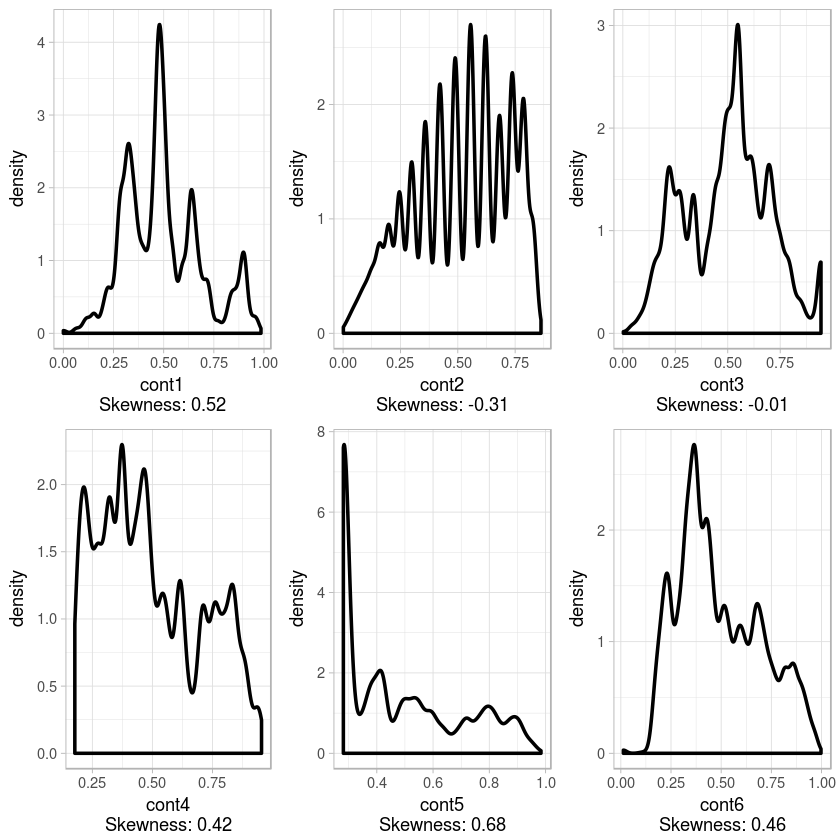

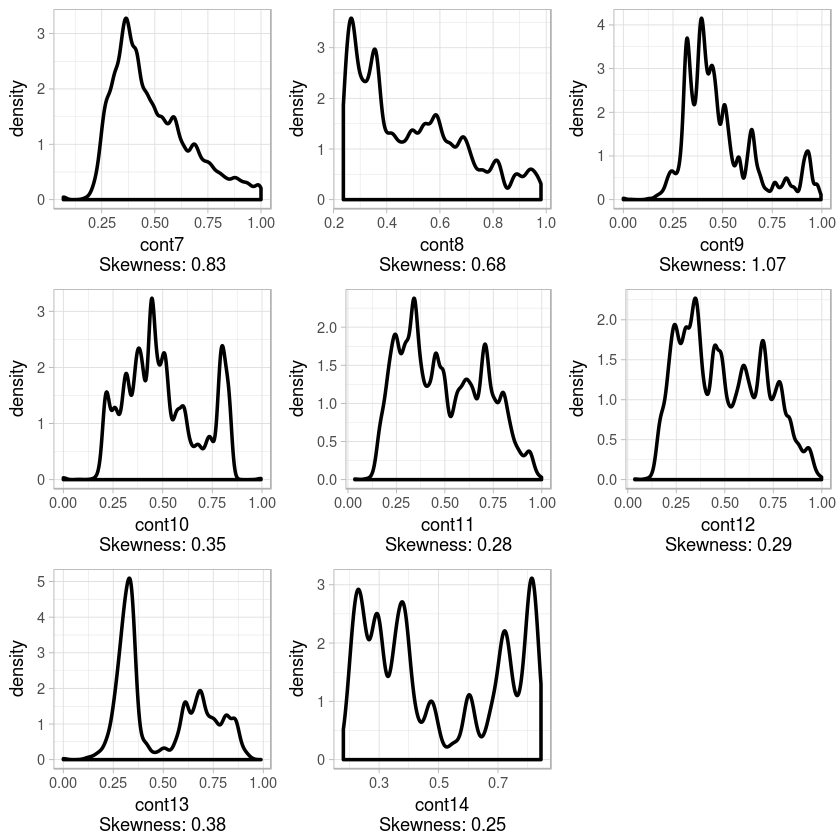

In [11]:
doPlots(dt_train_num, fun = plotDen, ii =1:6, lab=log(dt_train$loss), ncol = 3)
doPlots(dt_train_num, fun = plotDen, ii =7:14, lab=log(dt_train$loss), ncol = 3)

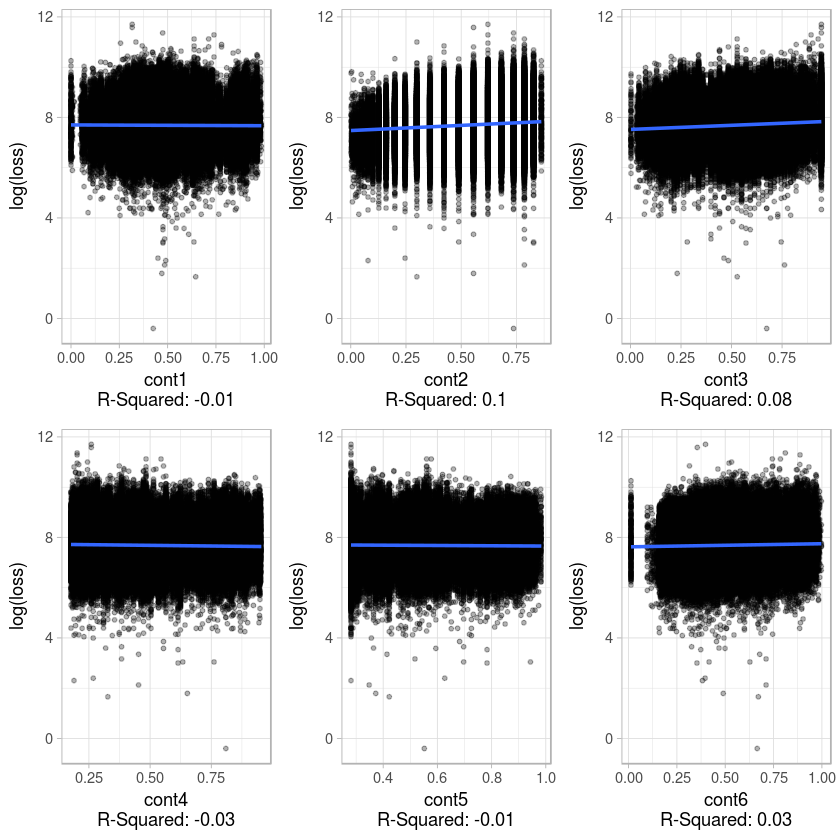

In [12]:
doPlots(dt_train_num, fun = plotScatter, ii =1:6, lab=log(dt_train$loss), ncol = 3)

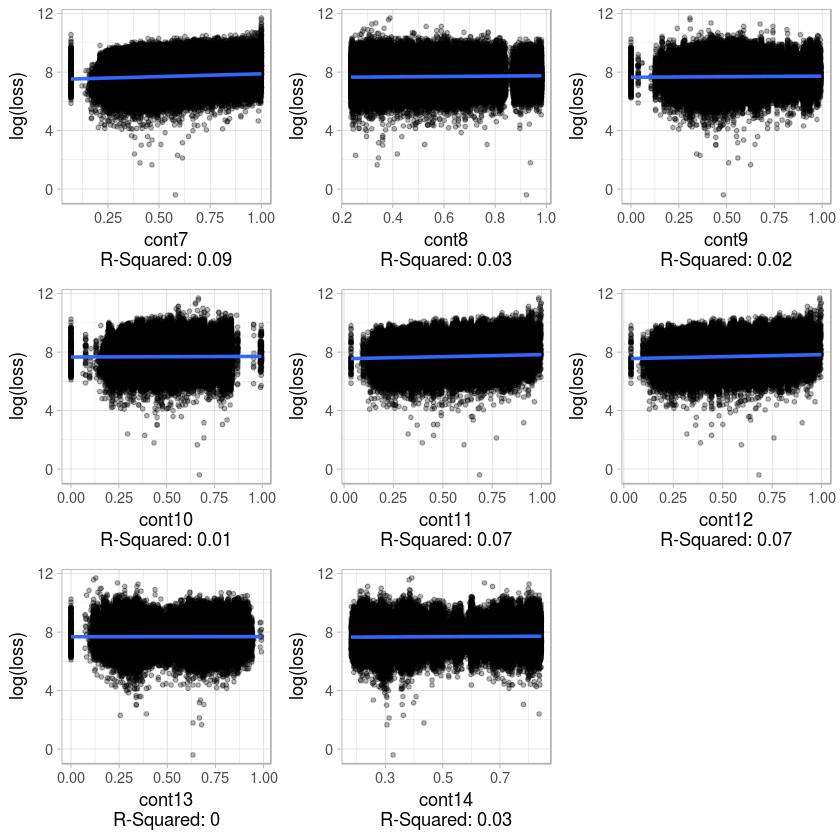

In [13]:
doPlots(dt_train_num, fun = plotScatter, ii =7:14, lab=log(dt_train$loss), ncol = 3)

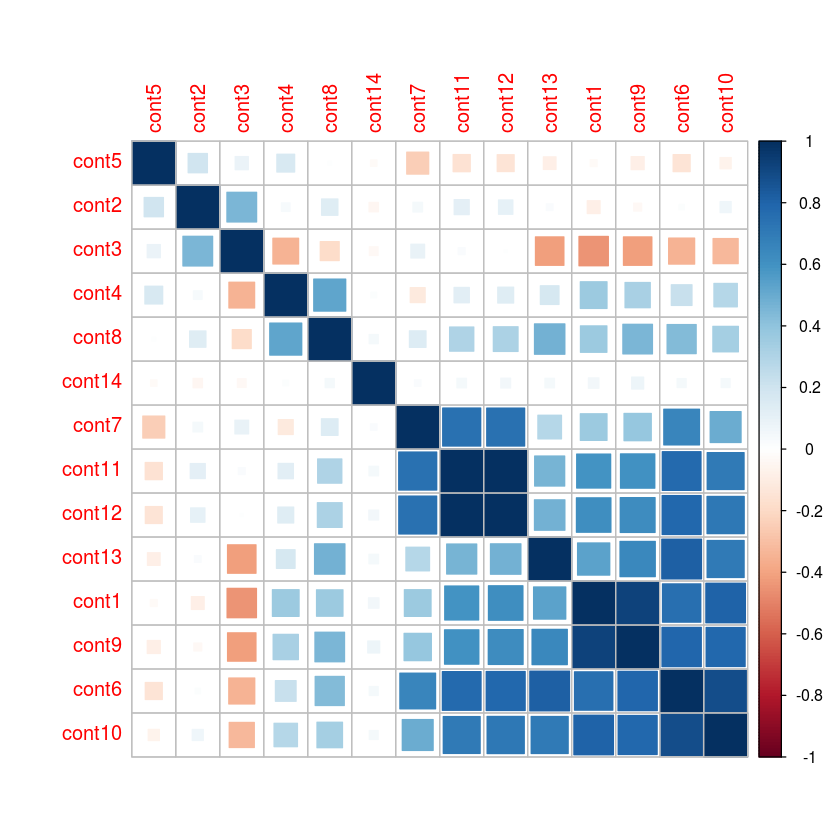

In [14]:
correlations <- cor(dt_train_num)
corrplot(correlations, method="square", order="hclust")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


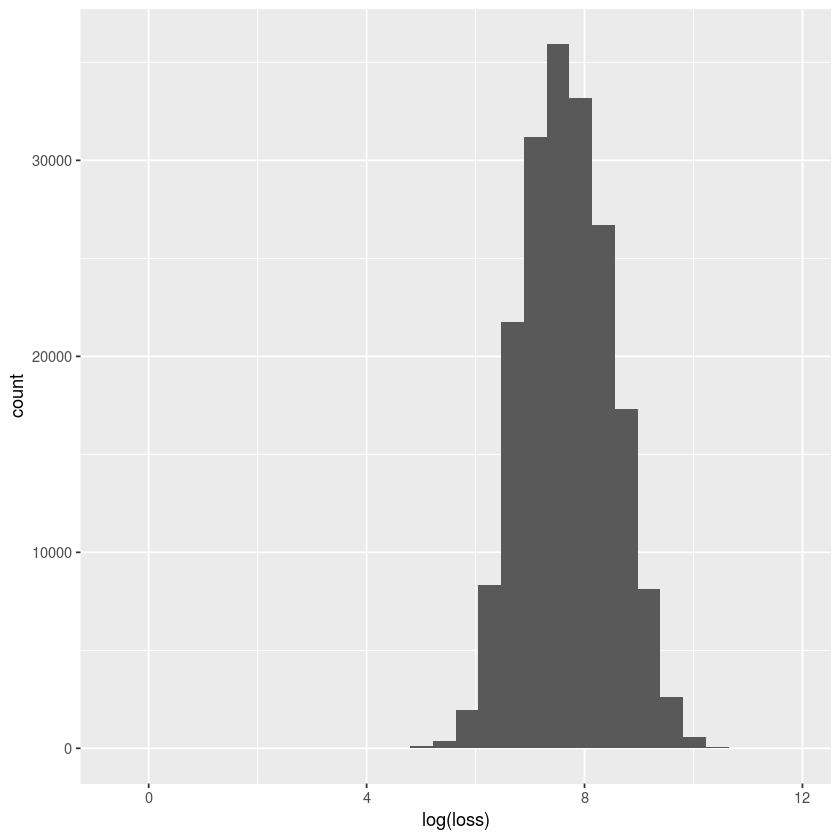

In [15]:
ggplot(dt_train) + geom_histogram(mapping=aes(x=log(loss)))